In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1><center>Steps 1-3</center></h1>

1) [x] Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2) [x] Проведите первичный анализ.
- а) Проверьте количество записей для каждого класса. Сделайте вывод.
3) [x] Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [2]:
df = pd.read_csv('glass.csv')

<center><b>EDA</b></center>

In [4]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
l = [len(df[df["Type"] == i]) for i in df['Type'].unique()]
pd.DataFrame(data=l, index=df['Type'].unique(), columns=['Count'])

,Count
1,70
2,76
3,17
5,13
6,9
7,29


<h1><center>Steps 4-5</center></h1>

4) [x] Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5) [x] Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier as forest

from sklearn.metrics import accuracy_score as acc

In [9]:
forest_model = forest()

In [10]:
def model_score(data):
    X, y = data.copy().drop('Type', axis=1), data['Type']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=76)
    
    forest_model.fit(X_train, y_train)
    yhat = forest_model.predict(X_test)

    print(f'Accuracy of the forest is {round(acc(y_test, yhat), 4) * 100}%')

In [11]:
model_score(df)

Accuracy of the forest is 81.39999999999999%


<h1><center>Step 6</center></h1>

6) [x] Обработайте выбросы в данных.

- а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

In [16]:
xx, yy = df.copy().drop('Type', axis=1), df['Type']

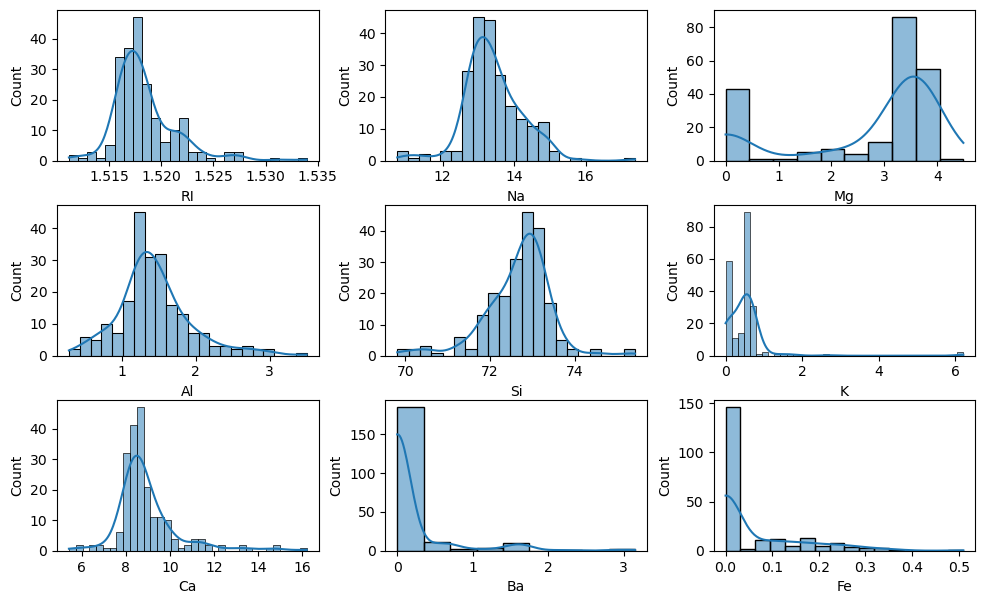

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,6))
fig.tight_layout()

for col, n in zip(xx, range(1, len(xx)+1)):
    plt.subplot(3, 3, n)
    sns.histplot(xx[col], kde=True)

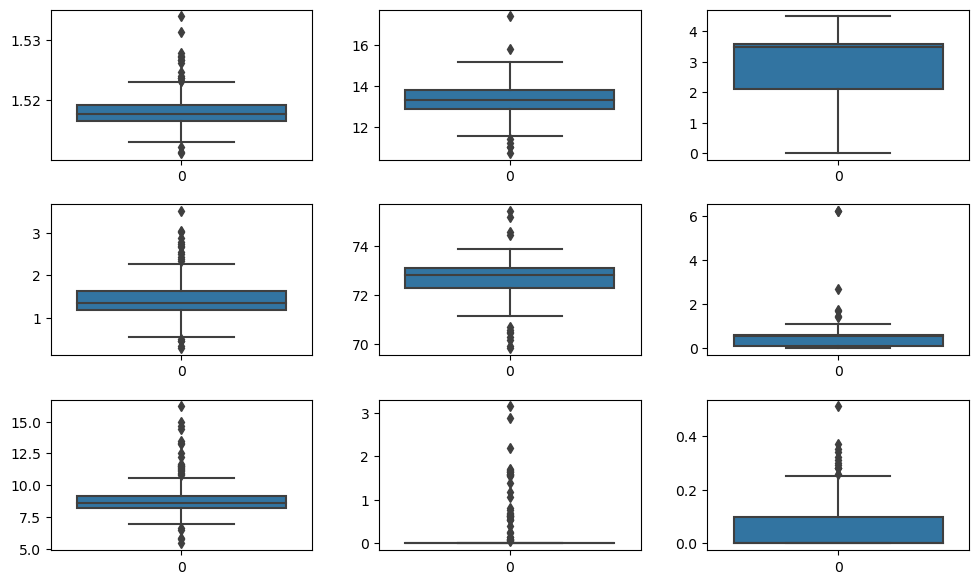

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,6))
fig.tight_layout()

for col, n in zip(xx, range(1, len(xx)+1)):
    plt.subplot(3, 3, n)
    sns.boxplot(xx[col])

<center>Что-то похожее на нормальное распределение наблюдается у признаков:</center>

- [x] RI
- [x] Na
- [x] Al
- [x] Si
- [x] Ca

- b) Исследуйте признаки на выбросы несколькими способами.

Статистические тесты - Na & Si

In [21]:
# Na has the widest quantiles and its outside dots look more like abnormal
col = xx['Na']
q3 = col.quantile(q=0.75)
q1 = col.quantile(q=0.25)
Iqr = q3 - q1

left = q1 - 0.5 * Iqr
right = q3 + 0.5 * Iqr

In [22]:
drop1 = xx[(col <= left) | (col >= right)].index

In [23]:
# Has the most normal distribution
col = xx['Si']
sigm3 = (col.std() * 2)
left = col.mean() - sigm3
right = col.mean() + sigm3

In [24]:
drop2 = xx[(col <= left) | (col >= right)].index

Isolation Forest - RI

In [25]:
from sklearn.ensemble import IsolationForest

In [27]:
iso_forest = IsolationForest(random_state=15)

col = xx[['Al']]
abnormhat = iso_forest.fit_predict(col, yy)

In [30]:
drop3 = [ind for n, ind in zip(abnormhat, range(len(xx))) if n == -1]

RI_norm = xx.copy().drop(drop3, axis=0)

KNN - CA

In [31]:
from sklearn.neighbors import LocalOutlierFactor as LOF

In [32]:
lof = LOF(n_neighbors=20
         )

col = xx[['Ca']]
abnormhat = lof.fit_predict(col, yy)

In [33]:
drop4 = [ind for n, ind in zip(abnormhat, range(len(xx))) if n == -1]

Ca_norm = xx.copy().drop(drop4, axis=0)

SVM - Al

In [34]:
from sklearn.svm import OneClassSVM as OCSVM

In [35]:
svm = OCSVM(
    kernel='sigmoid',
    degree=3
)

col = xx[['Al']]
abnormhat = svm.fit_predict(xx, yy)

In [36]:
drop5 = [ind for n, ind in zip(abnormhat, range(len(xx))) if n == -1]

Al_norm = xx.copy().drop(drop5, axis=0)

- c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.|

Будем удалять только те значения, вся строка которых предсказана как выбросная. just for fun

In [37]:
drop = drop1.intersection(drop2).intersection(drop3).intersection(drop4).intersection(drop5)

In [38]:
easy_X = df.copy().drop(drop, axis=0)
print(f'{round((1 - len(easy_X) / len(df)) * 100, 2)}% данных удалится при щадящей чистке')

0.93% данных удалится при щадящей чистке


In [39]:
hard_X = df.drop(drop1, axis=0)
hard_X = df.drop(drop2, axis=0)
hard_X = df.drop(drop3, axis=0)
hard_X = df.drop(drop4, axis=0)
hard_X = df.drop(drop5, axis=0)

In [41]:
print(f'{round((1 - len(hard_X) / len(xx)) * 100, 2)}% данных удалится при жёсткой чистке')

50.0% данных удалится при жёсткой чистке


<h1><center>Step 7</center></h1>

7) [x] Повторите п. 4, п. 5.

In [42]:
model_score(easy_X)

Accuracy of the forest is 76.74%


In [43]:
model_score(hard_X)

Accuracy of the forest is 81.82000000000001%


<h1><center>Conclusions</center></h1>

8) [x] Сформулируйте выводы по проделанной работе.
- а) Кратко опишите, какие преобразования были сделаны с данными.
- b) Сравните точность двух моделей.
- c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

<h1>Выводы:</h1>

1) Была произведена очистка выбросов. Были применены почти все обсуждённые в обучении методы
2) Реализация очистки выбросов "вручную" привела к уменьшению точности модели. Видимо, удалились какие-то важные данные. Подразумеваю, что из Типа №6, т.к. там очень мало входов - 6.
- Кажется, эффективнее для очистки выбросов было бы использовать ансамбль различных моделей, или же остановиться на одной единственной.
- Также было бы интересно проследить, в чём именно была ошибка чистки вручную
- Ещё думаю, что точность могла упасть из-за массовой чистки выбросов различными способами. Думаю, что одна модель на разных классах справилась бы лучше.
3) Да, в теории, определённо нужно. Однако необходимо разработать точную стратегию и точно понимать, что делается. Пока рука не набита(